##### ¿Estimar el ritmo de ventas de la empresa con el fin de estimar el espacio que se necesitará para una futura mudanza de los almacenes?

In [49]:
import pandas as pd

url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"
dataset = pd.read_csv(url)

In [50]:
dataset.head(2)

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211


In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [52]:
dataset['date'] = pd.to_datetime(dataset['date'])

In [53]:
dataset.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    366 non-null    datetime64[ns]
 1   sales   366 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [55]:
dataset.set_index("date", inplace = True)
ts = dataset['sales']
ts.head()

date
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
Name: sales, dtype: float64

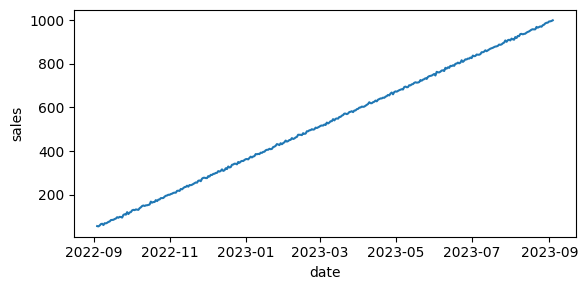

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (6, 3))

sns.lineplot(data = ts)

plt.tight_layout()

plt.show()

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts)
decomposition

In [58]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

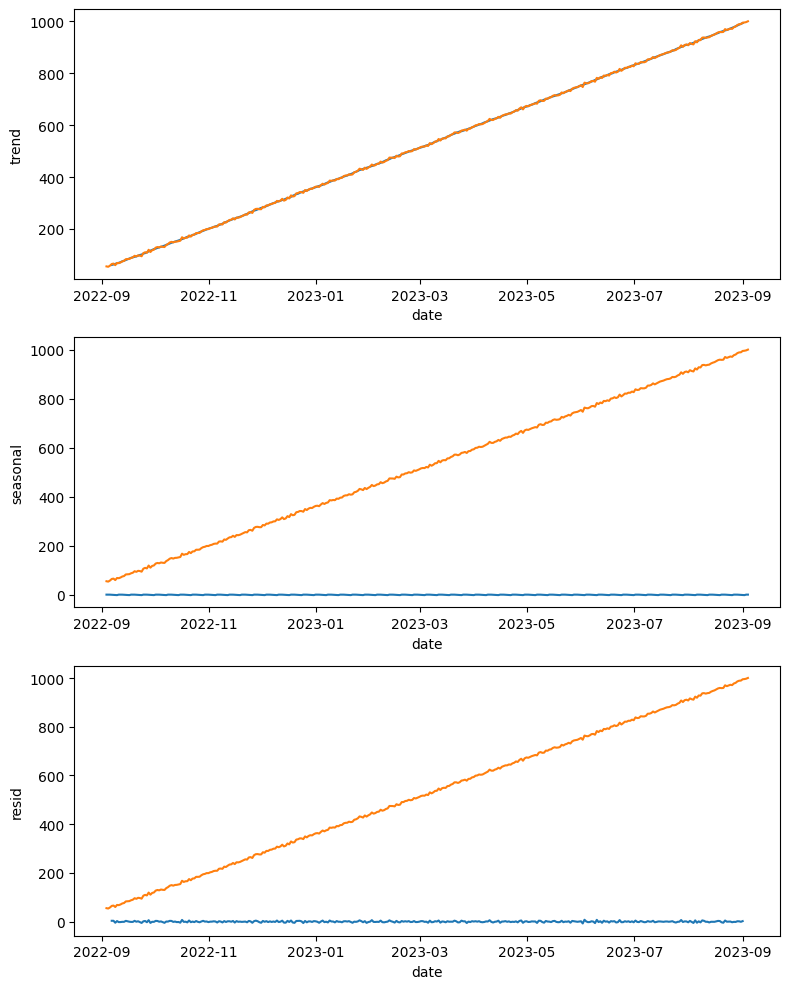

In [59]:
fig, axis = plt.subplots(3, 1, figsize = (8,10))

sns.lineplot(ax = axis[0], data = trend)
sns.lineplot(ax = axis[0], data = ts)

sns.lineplot(ax = axis[1], data = seasonal)
sns.lineplot(ax = axis[1], data = ts)

sns.lineplot(ax = axis[2], data = residual)
sns.lineplot(ax = axis[2], data = ts)

plt.tight_layout()

plt.show()

Tendencia creciente sin estacionalidad aparente, sin gran variabilidad.

Evaluando estacionariedad

In [60]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

p > 0.05, no se rechaza la hipotesis nula, por lo cual la serie no es estacionaria.

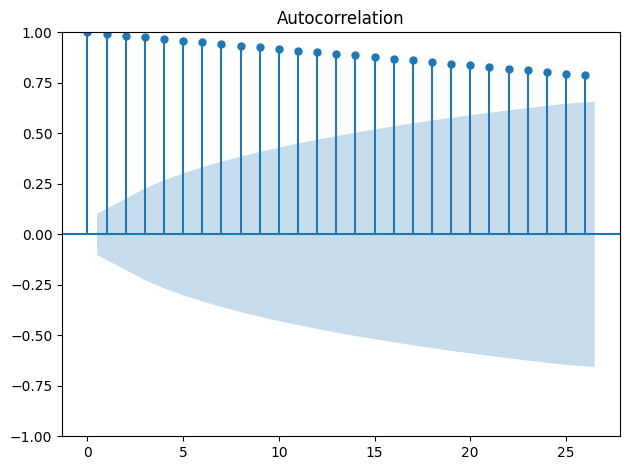

In [61]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts)

plt.tight_layout()

plt.show()

In [85]:
from pmdarima import auto_arima

model = auto_arima(ts, seasonal = False, trace = False)

In [88]:
prediccion = model.predict(200)

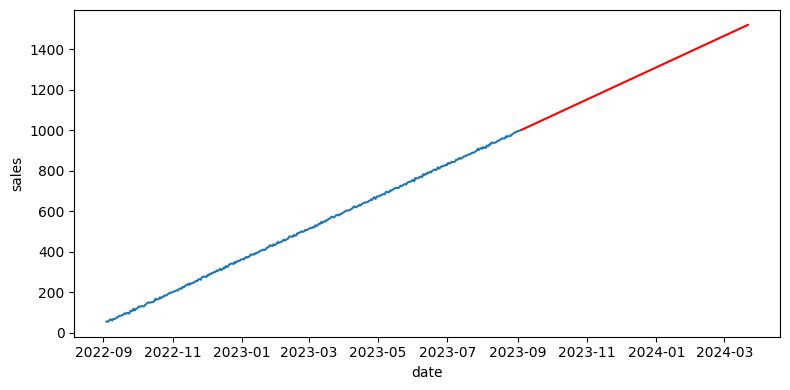

In [89]:
fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts)
sns.lineplot(data = prediccion, c = 'red')

plt.tight_layout()

plt.show()